# Regression

In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels as sm
import warnings

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

Regression is a statistical tool to analyze the relationships between variables.
Its composed of many statistical models to explore the relationship between a response variable (dependent variable) and some exploratory variables (independent variables), so, given values of the explanatory variables we can predict the values of the response variable.

Two main types:
- Linear Regression: the response variable is numeric
- Logistic Regression: the response variable is logical (True or False values)

## Before start

Before playing with any regression, **visualize the data**.
**Scatterplots** are very interesting as this stage. **Regplot** adds a trend line to the scatterplot.

In [ ]:
taiwan_real_estate = pd.read_csv('../data/taiwan_real_estate2.csv')
taiwan_real_estate.head()

In [ ]:
taiwan_real_estate['house_age_years'] = taiwan_real_estate['house_age_years'].astype('category')

In [ ]:
taiwan_real_estate.info()

To keep it simple, lets focus on the simple linear regression, that is, using a single explanatory variable to predict the response variable. In this case, lets use the *n_convinience* variable to predict *price_twd_msq*

In [ ]:
sns.scatterplot(data=taiwan_real_estate, x='n_convenience', y='price_twd_msq')
plt.show()

In [ ]:
sns.regplot(x='n_convenience',
         y='price_twd_msq',
         data=taiwan_real_estate,
         ci=90,
         scatter_kws={'alpha': 0.5})

The fitted lines are defined by:
- Intercept: y value at x=0
- Slope: steepness. The amount the y value increases when x increases 1 unit

$$
  y = intercept + slope*x
$$

## Run the linear regression model

In [ ]:
from statsmodels.formula.api import ols

In [ ]:
mdl_price_vs_conv = ols("price_twd_msq ~ n_convenience",
                           data=taiwan_real_estate)

In [ ]:
mdl_price_vs_conv = mdl_price_vs_conv.fit()

In [ ]:
print(mdl_price_vs_conv.params)

On average, a house with zero convenience stores nearby had a price of 8.2242 TWD per square meter.

If you increase the number of nearby convenience stores by one, then the expected increase in house price is 0.7981 TWD per square meter.



## Run the linear Regression Model using a categorical variable
Lets predict the price using the age of the property.

In [ ]:
taiwan_real_estate.house_age_years.value_counts()

The '0 to 15' value will be used as the baseline. The other coeficients will be calculated in relation to that one

In [ ]:
sns.displot(data=taiwan_real_estate,
            x="price_twd_msq",
            col="house_age_years",
            bins=10)

In [ ]:
mdl_price_vs_age = ols("price_twd_msq ~ house_age_years",
                           data=taiwan_real_estate)

In [ ]:
mdl_price_vs_age=mdl_price_vs_age.fit()

In [ ]:
print(mdl_price_vs_age.params)

If we want to calculate all the coefficients from 0 we can slightly edit the formula adding a *'+ 0'*

In [ ]:
mdl_price_vs_age = ols("price_twd_msq ~ house_age_years + 0",
                           data=taiwan_real_estate)

In [ ]:
mdl_price_vs_age=mdl_price_vs_age.fit()

In [ ]:
print(mdl_price_vs_age.params)

In [ ]:
taiwan_real_estate.groupby('house_age_years')['price_twd_msq'].mean()

## Predictions

In [ ]:
import numpy as np

# Create explanatory_data 
explanatory_data = pd.DataFrame({'n_convenience': np.arange(0, 11)})

# Use mdl_price_vs_conv to predict with explanatory_data, call it price_twd_msq
price_twd_msq = mdl_price_vs_conv.predict(explanatory_data)

# Create prediction_data
prediction_data = explanatory_data.assign(price_twd_msq = price_twd_msq)

# Print the result
print(prediction_data)

In [ ]:
# Create a new figure, fig
fig = plt.figure()

sns.regplot(x="n_convenience",
            y="price_twd_msq",
            data=taiwan_real_estate,
            ci=None)
# Add a scatter plot layer to the regplot
sns.scatterplot(x="n_convenience",
            y="price_twd_msq",
            data=prediction_data,
            color='r')

# Show the layered plot
plt.show()

## The model objects

In [ ]:
mdl_price_vs_conv.params

In [ ]:
mdl_price_vs_conv.fittedvalues

The .fittedvalues is a shortcut to access the predictions on the original dataset. Its equivalent to:

In [ ]:
mdl_price_vs_conv.predict(taiwan_real_estate.n_convenience)

In [ ]:
# Residuals are the difference between the observed response values and the predicted ones
mdl_price_vs_conv.resid

In [ ]:
mdl_price_vs_conv.summary()

In [ ]:
coeffs = mdl_price_vs_conv.params

intercept = coeffs['Intercept']
slope = coeffs['n_convenience']

# Manually calculate the predictions
price_twd_msq = intercept + slope*explanatory_data
print(price_twd_msq)

print(price_twd_msq.assign(predictions_auto=mdl_price_vs_conv.predict(explanatory_data)))

## Regression to the mean

Response = fitted value + residual
- Fitted value: what the model can explain
- Residual: what the model can not explain

Residuals exist due to problems in the model and fundamental randomness
Extreme values will tend to go towards the mean when we predict them

In [ ]:
sp500_yearly_returns = pd.read_csv('../data/sp500_yearly_returns.csv')

In [ ]:
sp500_yearly_returns.info()

In [ ]:
sp500_yearly_returns.head()

In [ ]:
sp500_yearly_returns['symbol'] = sp500_yearly_returns['symbol'].astype('category')

In [ ]:
sp500_yearly_returns.info()

In [ ]:
# Create a new figure, fig
fig = plt.figure()

# Plot the first layer: y = x
plt.axline(xy1=(0,0), slope=1, linewidth=2, color="green")

# Add scatter plot with linear regression trend line
sns.regplot(data=sp500_yearly_returns, x='return_2018', y='return_2019', ci=None)

# Set the axes so that the distances along the x and y axes look the same
plt.axis('equal')

# Show the plot
plt.show()

In [ ]:
mdl_returns = ols('return_2019 ~ return_2018', data=sp500_yearly_returns).fit()
mdl_returns.params

In [ ]:
mdl_returns = ols("return_2019 ~ return_2018", data=sp500_yearly_returns).fit()
explanatory_data = pd.DataFrame({'return_2018': [-1, 0, 1]})
print(mdl_returns.predict(explanatory_data))

## Transforming variables

Sometimes the relation between the dependent and independent variables is not a straight line.

In [ ]:
sns.regplot(data=taiwan_real_estate, x='dist_to_mrt_m', y='price_twd_msq', ci=None)
plt.show()

In [ ]:
# Create sqrt_dist_to_mrt_m
taiwan_real_estate["sqrt_dist_to_mrt_m"] = np.sqrt(taiwan_real_estate["dist_to_mrt_m"])

plt.figure()

# Plot using the transformed variable
sns.regplot(data=taiwan_real_estate,
x='sqrt_dist_to_mrt_m', y='price_twd_msq', ci=None)
plt.show()

In [ ]:
# Run a linear regression of price_twd_msq vs. sqrt_dist_to_mrt_m
mdl_price_vs_dist = ols("price_twd_msq ~ sqrt_dist_to_mrt_m", 
                        data=taiwan_real_estate).fit()

# Use this explanatory data
explanatory_data = pd.DataFrame({"sqrt_dist_to_mrt_m": np.sqrt(np.arange(0, 81, 10) ** 2),
                                "dist_to_mrt_m": np.arange(0, 81, 10) ** 2})

# Use mdl_price_vs_dist to predict explanatory_data
prediction_data = explanatory_data.assign(
    price_twd_msq = mdl_price_vs_dist.predict(explanatory_data)
)

fig = plt.figure()
sns.regplot(x="sqrt_dist_to_mrt_m", y="price_twd_msq", data=taiwan_real_estate, ci=None)

# Add a layer of your prediction points
sns.scatterplot(data=prediction_data, 
                x='sqrt_dist_to_mrt_m', 
                y='price_twd_msq', 
                color='red')
plt.show()

In [ ]:
ad_conversion = pd.read_csv('../data/ad_conversion.csv')
ad_conversion.head()

In [ ]:
# Create qdrt_n_impressions and qdrt_n_clicks
ad_conversion["qdrt_n_impressions"] = ad_conversion['n_impressions'] ** 0.25
ad_conversion["qdrt_n_clicks"] = ad_conversion['n_clicks'] ** 0.25

plt.figure()

# Plot using the transformed variables
sns.regplot(data=ad_conversion, x='qdrt_n_impressions', y="qdrt_n_clicks")
plt.show()

In [ ]:
ad_conversion["qdrt_n_impressions"] = ad_conversion["n_impressions"] ** 0.25
ad_conversion["qdrt_n_clicks"] = ad_conversion["n_clicks"] ** 0.25

mdl_click_vs_impression = ols("qdrt_n_clicks ~ qdrt_n_impressions", data=ad_conversion, ci=None).fit()

explanatory_data = pd.DataFrame({"qdrt_n_impressions": np.arange(0, 3e6+1, 5e5) ** .25,
                                 "n_impressions": np.arange(0, 3e6+1, 5e5)})

# Complete prediction_data
prediction_data = explanatory_data.assign(
    qdrt_n_clicks = mdl_click_vs_impression.predict(explanatory_data.qdrt_n_impressions)
)

# Print the result
print(prediction_data)

In [ ]:
# Back transform qdrt_n_clicks
prediction_data["n_clicks"] = prediction_data.qdrt_n_clicks ** 4
print(prediction_data)

In [ ]:
# Back transform qdrt_n_clicks
prediction_data["n_clicks"] = prediction_data["qdrt_n_clicks"] ** 4

# Plot the transformed variables
fig = plt.figure()
sns.regplot(x="qdrt_n_impressions", y="qdrt_n_clicks", data=ad_conversion, ci=None)

# Add a layer of your prediction points
sns.scatterplot(data=prediction_data, x='qdrt_n_impressions', y='qdrt_n_clicks', color='red')
plt.show()

# Quantifying model fit

How good is our model?

## Coefficient of Determination (r-squared)

The proportion of the variance in the response variable that is predictable from the explanatory variable.

1 -> perfect fit
0 -> the worst possible fit

Statsmodels provides the r-squared value in the **.summary()** output of the fitted model. It can be accessed via the **.rsquared** attribute too.

## Residual standard error (RSE)

The residual standard error is the "typical" difference between a prediction and an observed response.

It has the same units as the response variable.

A related metric is the Mean Squared Error, or MSE, that is MSE^2. Another related metric is the RMSE (Root Mean Squared Error)


In [ ]:
print(mdl_click_vs_impression.summary())


In [ ]:
print(mdl_click_vs_impression.rsquared)

In [ ]:
mse = mdl_click_vs_impression.mse_resid
rse = np.sqrt(mse)
print("RSE: ", rse)


## Visualizing model fit

The residuals of a well fitted model:
- Are normally distributed
- Have mean zero

A **scatterplot of residuals vs fitted values** helps visualizing trends.

In [ ]:
sns.residplot(x="n_convenience", y="price_twd_msq", data=taiwan_real_estate, lowess=True)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")

plt.show()

**QQ plots** help visualizing if the residuals follow a normal distribution (residuals along the line) or not (residuals far from it).

In [ ]:
from statsmodels.api import qqplot
qqplot(data=mdl_price_vs_conv.resid, fit=True, line="45")

plt.show()

The **Scale Location plot**, plots the squared root of the standardized residuals vs the fitted value. It shows if the residuals grow along with the fitted value.

In [ ]:
model_norm_residuals = mdl_price_vs_conv.get_influence().resid_studentized_internal
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

sns.regplot(x=mdl_price_vs_conv.fittedvalues, y=model_norm_residuals_abs_sqrt, ci=None, lowess=True)
plt.xlabel("Fitted values")
plt.ylabel("Sqrt of abs val of stdized residuals")

plt.show()

## Outliers, Leverage and Influence

**Outliers** are unusual data points. They could be explanatory datapoints away from the rest or datapoints away from the prediction line.

**Leverage** is a measure of how extreme the explanatory variable values are

**Influence** of an observation measures how much the model would change if we left out that observation. Statsmodel provides the cook's distance as a measure to evaluate the influence of each datapoint.

In [ ]:
summary_info = mdl_price_vs_dist.get_influence().summary_frame()

# Add the hat_diag column to taiwan_real_estate, name it leverage
taiwan_real_estate["leverage"] = summary_info.hat_diag

# Sort taiwan_real_estate by leverage in descending order and print the head
taiwan_real_estate.sort_values(by='leverage', ascending=False).head()

In [ ]:
# Add the cooks_d column to taiwan_real_estate, name it cooks_dist
taiwan_real_estate["cooks_dist"] = summary_info["cooks_d"]

# Sort taiwan_real_estate by cooks_dist in descending order and print the head.
taiwan_real_estate.sort_values(by='cooks_dist', ascending=False).head()

# Logistic Regression

- a type of generalized linear model
- used when the response variable is logical
- the responses follow a logistic (S-shaped) curve

When the response variable is logical, all the points lie on the  and lines, making it difficult to see what is happening. This can be solved with a histogram of the explanatory variable, grouped by the response.


In [ ]:
churn = pd.read_csv('../data/churn.csv')

In [ ]:
# Create the histograms of time_since_last_purchase split by has_churned
sns.displot(data=churn, x='time_since_last_purchase', col='has_churned')

plt.show()

In [ ]:
sns.displot(data=churn, x='time_since_first_purchase', col='has_churned')

plt.show()

In [ ]:
# Draw a linear regression trend line and a scatter plot of time_since_first_purchase vs. has_churned
sns.regplot(x="time_since_first_purchase",
            y="has_churned",
            data=churn, 
            ci=None,
            line_kws={"color": "red"})

# Draw a logistic regression trend line and a scatter plot of time_since_first_purchase vs. has_churned
sns.regplot(x="time_since_first_purchase",
            y="has_churned",
            data=churn, 
            ci=None,
            line_kws={"color": "blue"}, logistic=True)

plt.show()

In [ ]:
# Import logit
from statsmodels.formula.api import logit

# Fit a logistic regression of churn vs. length of relationship using the churn dataset
mdl_churn_vs_relationship = logit('has_churned ~ time_since_first_purchase', data=churn).fit()

# Print the parameters of the fitted model
print(mdl_churn_vs_relationship.params)

In [ ]:
explanatory_data=pd.DataFrame({'time_since_first_purchase': np.arange(-1.5, 4.24, 0.25)})
explanatory_data

In [ ]:
# Create prediction_data
prediction_data = explanatory_data.assign(
  has_churned=mdl_churn_vs_relationship.predict(explanatory_data)
)

# Print the head
print(prediction_data.head())

In [ ]:
# Create prediction_data
prediction_data = explanatory_data.assign(
    has_churned = mdl_churn_vs_relationship.predict(explanatory_data)
)

fig = plt.figure()

# Create a scatter plot with logistic trend line
sns.regplot(data=churn, y='has_churned', x='time_since_first_purchase', logistic=True, ci=None)

# Overlay with prediction_data, colored red
sns.scatterplot(data=prediction_data, y='has_churned', x='time_since_first_purchase',
color='red')

plt.show()

In [ ]:
# Update prediction data by adding most_likely_outcome
prediction_data["most_likely_outcome"] = np.round(prediction_data["has_churned"])

fig = plt.figure()

# Create a scatter plot with logistic trend line (from previous exercise)
sns.regplot(x="time_since_first_purchase",
            y="has_churned",
            data=churn,
            ci=None,
            logistic=True)

# Overlay with prediction_data, colored red
sns.scatterplot(data=prediction_data, x="time_since_first_purchase", y='most_likely_outcome', color='red')

plt.show()

In [ ]:
# Update prediction data with odds_ratio
prediction_data["odds_ratio"] = prediction_data["has_churned"] / (1 - prediction_data["has_churned"])

fig = plt.figure()

# Create a line plot of odds_ratio vs time_since_first_purchase
sns.lineplot(data=prediction_data, y='odds_ratio', x='time_since_first_purchase')

# Add a dotted horizontal line at odds_ratio = 1
plt.axhline(y=1, linestyle="dotted")

plt.show()

In [ ]:
# Update prediction data with log_odds_ratio
prediction_data["log_odds_ratio"] = np.log(prediction_data["odds_ratio"])

fig = plt.figure()

# Update the line plot: log_odds_ratio vs. time_since_first_purchase
sns.lineplot(x="time_since_first_purchase",
             y="log_odds_ratio",
             data=prediction_data)

# Add a dotted horizontal line at log_odds_ratio = 0
plt.axhline(y=0, linestyle="dotted")

plt.show()

## Quantifying logistic regression fit

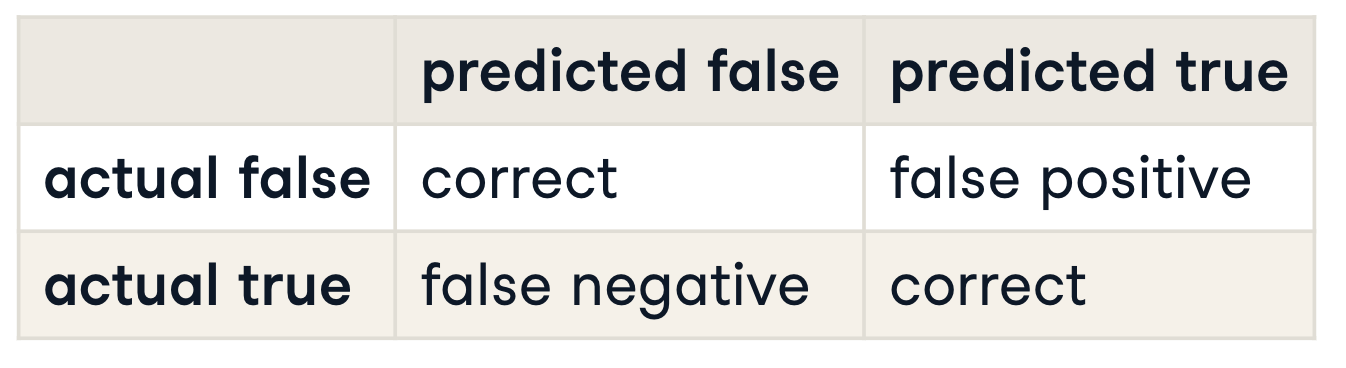

The count of the different categories is called **confusion matrix**

In [ ]:
actual_response = churn.has_churned

In [ ]:
mdl_churn_vs_relationship.pred_table()

In [ ]:
from statsmodels.graphics.mosaicplot import mosaic
mosaic(mdl_churn_vs_relationship.pred_table())

## Model Accuracy

accuracy = (TN+TP)/(TN+TP+FN+FP)

## Sensitivity

Sensitivity = (TP)/(TP+FN)

## Specificity

Specificity = (TN)/(TN+FP)

There is a tradeoff between sensitivity and specificity

In [ ]:
conf_matrix = mdl_churn_vs_relationship.pred_table()

# Extract TN, TP, FN and FP from conf_matrix
TN = conf_matrix[0, 0]
TP = conf_matrix[1, 1]
FN = conf_matrix[1, 0]
FP = conf_matrix[0, 1]

# Calculate and print the accuracy
accuracy = (TN+TP)/(TN+TP+FN+FP)
print("accuracy: ", accuracy)

# Calculate and print the sensitivity
sensitivity = (TP)/(TP+FN)
print("sensitivity: ", sensitivity)

# Calculate and print the specificity
specificity = (TN)/(TN+FP)
print("specificity: ", specificity)